In [98]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [99]:
#importing dataset
data = pd.read_csv('C:/Users/Dell/Downloads/KO (1).csv')
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,58.820000,59.310001,58.380001,59.299999,57.596004,20187300
1,2022-01-04,59.730000,60.540001,59.590000,60.290001,58.557556,26141600
2,2022-01-05,60.090000,61.200001,60.049999,60.790001,59.043186,22507300
3,2022-01-06,60.470001,61.119999,60.439999,60.470001,58.732384,17902300
4,2022-01-07,60.279999,60.720001,60.060001,60.330002,58.596409,12307900
...,...,...,...,...,...,...,...
246,2022-12-23,63.500000,63.869999,63.200001,63.820000,63.820000,6463300
247,2022-12-27,63.930000,64.290001,63.709999,64.209999,64.209999,7320700
248,2022-12-28,64.459999,64.650002,63.490002,63.570000,63.570000,7159400
249,2022-12-29,63.799999,64.150002,63.700001,63.950001,63.950001,7169300


In [100]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [101]:
data.tail

<bound method NDFrame.tail of            Date       Open       High        Low      Close  Adj Close  \
0    2022-01-03  58.820000  59.310001  58.380001  59.299999  57.596004   
1    2022-01-04  59.730000  60.540001  59.590000  60.290001  58.557556   
2    2022-01-05  60.090000  61.200001  60.049999  60.790001  59.043186   
3    2022-01-06  60.470001  61.119999  60.439999  60.470001  58.732384   
4    2022-01-07  60.279999  60.720001  60.060001  60.330002  58.596409   
..          ...        ...        ...        ...        ...        ...   
246  2022-12-23  63.500000  63.869999  63.200001  63.820000  63.820000   
247  2022-12-27  63.930000  64.290001  63.709999  64.209999  64.209999   
248  2022-12-28  64.459999  64.650002  63.490002  63.570000  63.570000   
249  2022-12-29  63.799999  64.150002  63.700001  63.950001  63.950001   
250  2022-12-30  63.919998  63.919998  63.169998  63.610001  63.610001   

       Volume  
0    20187300  
1    26141600  
2    22507300  
3    17902300  
4

In [102]:
#defining the target and independent variables
x = np.array((data[['Volume','Open','High','Low']]))
y = np.array((data['Close']))

In [103]:
# data preprocessing and exploration

In [104]:
x = preprocessing.scale(x)

In [105]:
num_data = ['Volume','Open','High','Low']
num_data

['Volume', 'Open', 'High', 'Low']

In [106]:
data['Close'].describe()

count    251.000000
mean      61.679761
std        2.514095
min       54.389999
25%       60.440000
50%       62.150002
75%       63.455000
max       66.209999
Name: Close, dtype: float64

In [107]:
q1 = data['Close'].quantile(0.25)
q1

60.4400005

In [108]:
# removing outliers
q1 = data['Close'].quantile(0.25)
q3 = data['Close'].quantile(0.75)
iqr = q3-q1
iqr
upper_limit = q3 + iqr*1.5
lower_limit = q1 - iqr*1.5
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else: 
        return value
data['Close'] = data['Close'].apply(limit_imputer)
data['Close'].describe()

count    251.000000
mean      61.711982
std        2.430881
min       55.917501
25%       60.440000
50%       62.150002
75%       63.455000
max       66.209999
Name: Close, dtype: float64

In [109]:
# Filling missing values
"""from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median' )
data[num_data] = imputer.fit_transform(data[num_data])"""

"from sklearn.impute import SimpleImputer\nimputer = SimpleImputer(missing_values = np.nan, strategy = 'median' )\ndata[num_data] = imputer.fit_transform(data[num_data])"

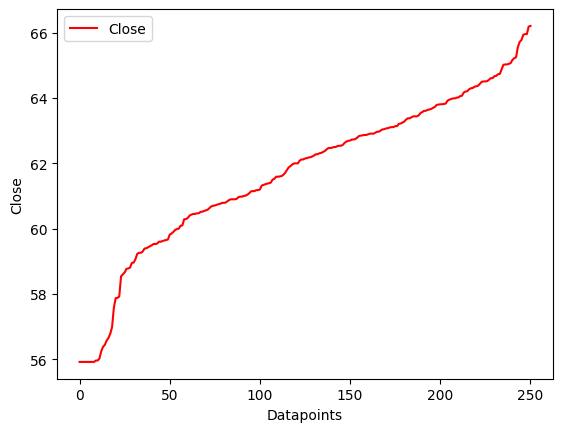

In [114]:
plt.figure(dpi = 100)
k = range(0, len(data)) #index of data at x-axis
plt.plot(k, data['Close'].sort_values(), color = 'red', label = 'Close')
plt.xlabel("Datapoints")
plt.ylabel("Close")
plt.legend()

# Linear Regression

In [ ]:
#splitting the training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [ ]:
#Implementing linear regression 
regressor = LinearRegression()

In [ ]:
#fitting the model
regressor.fit(x_train,y_train)

In [ ]:
# prediction
predictions = regressor.predict(x_test)

In [ ]:
predictions

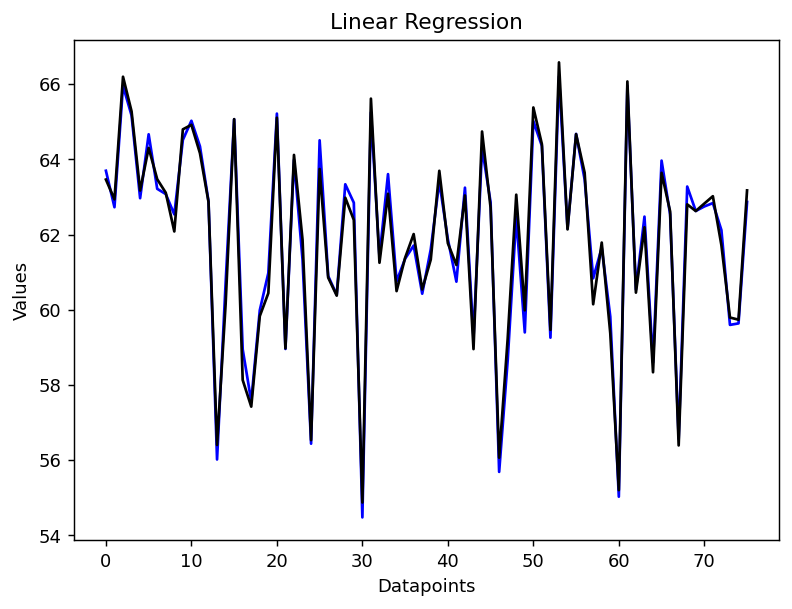

In [117]:
plt.figure(dpi = 130, figsize = (7,5))
plt.plot(y_test,color = 'b', label = 'Actuals')
plt.plot(predictions,color='k')
plt.title("Linear Regression")
plt.xlabel('Datapoints')
plt.ylabel('Values')
plt.show()


In [ ]:
dframe = pd.DataFrame({"Actual":y_test,"Predicted": predictions.flatten()})

In [ ]:
dframe.head()

# Calculating Errors

In [68]:
#Using MAE
residuals = predictions - y_test
from sklearn.metrics import mean_absolute_error
error_mean = mean_absolute_error(predictions,y_test)

error_mean

0.26310764442961015

In [69]:
# Using MSE
from sklearn.metrics import mean_squared_error
squared_error_mean = mean_squared_error(predictions, y_test)
squared_error_mean

0.10568476202580311

In [70]:
# Using RMSE
from sklearn.metrics import mean_squared_error
squared_error_mean = mean_squared_error(predictions, y_test)**0.5
squared_error_mean


0.32509192857683056

# SVR

In [71]:
#defining the target and independent variables
x = np.array(data[['Volume','Open','High','Low']])
y = np.array(data['Close'])

In [72]:
#splitting the training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [73]:
h1 = svm.SVR()

In [74]:
h1.fit(X_train,Y_train)

SVR()

In [75]:
Y_predict = h1.predict(X_test)

In [76]:
#Using MAE
residuals_svm = Y_predict - Y_test
from sklearn.metrics import mean_absolute_error
error_mean = mean_absolute_error(Y_predict,Y_test)

error_mean

1.9449566985968687

In [77]:
# Using MSE
from sklearn.metrics import mean_squared_error
squared_error_mean = mean_squared_error(Y_predict, Y_test)
squared_error_mean

6.464130443320957

In [78]:
# Using RMSE
from sklearn.metrics import mean_squared_error
squared_error_mean = mean_squared_error(Y_predict, Y_test)**0.5
squared_error_mean


2.5424654261800606

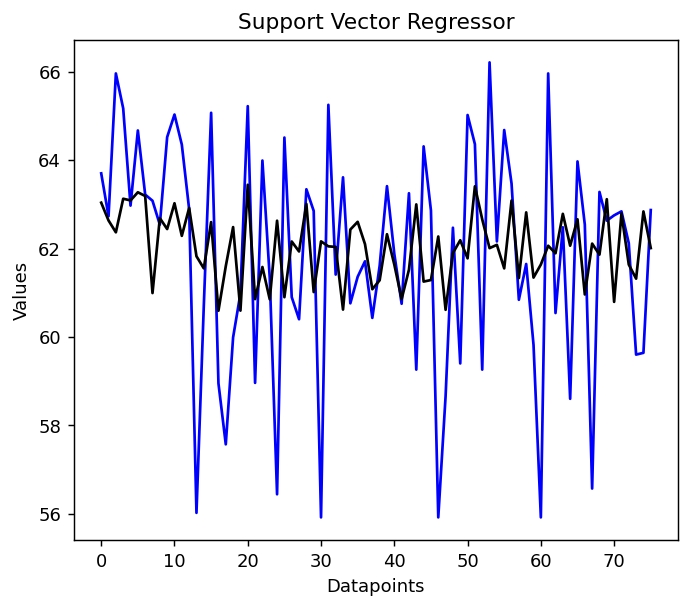

In [122]:
plt.figure(dpi = 130, figsize = (6,5))
plt.plot(Y_test,color = 'b')
plt.plot(Y_predict,color='k')
plt.title("Support Vector Regressor")
plt.xlabel('Datapoints')
plt.ylabel('Values')
plt.show()


# Random Forest

In [51]:
#defining the target and independent variables
x = np.array(data[['Volume','Open','High','Low']])
y = np.array(data['Close'])

In [52]:
#splitting the training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [53]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [54]:
# prediction
RFY_predict= model.predict(X_test)

In [55]:
RFY_predict 

array([63.55290022, 62.77510018, 65.19670122, 64.8396986 , 63.3921    ,
       64.28369915, 63.63810043, 63.38239994, 62.21889966, 64.52940115,
       64.68769994, 63.9107996 , 62.86579961, 56.57015111, 59.81419994,
       64.71030029, 58.58709941, 56.63667545, 59.85600071, 60.36849983,
       64.79709857, 59.39779937, 64.19099991, 61.27540026, 56.4189512 ,
       63.70160002, 60.86770072, 60.67929998, 63.0548002 , 61.3513005 ,
       55.92132605, 65.24270114, 60.96100076, 62.39939967, 59.99260084,
       61.09099998, 62.14509973, 60.59600039, 61.12310007, 63.76230005,
       61.93539973, 61.13770019, 62.94609938, 58.86620001, 64.46040062,
       62.43260021, 56.01105009, 60.04719979, 62.87789948, 60.03889973,
       65.02139963, 64.3254999 , 59.62300083, 65.20090122, 62.13739996,
       64.58669989, 63.55860044, 59.81429976, 62.19069939, 59.34019958,
       55.94967573, 65.25000089, 60.53740064, 62.33359908, 58.80090021,
       63.7226    , 62.33160009, 56.57197607, 63.46219981, 62.62

In [56]:
dframe = pd.DataFrame({"Actual":Y_test,"Predicted": RFY_predict .flatten()})

In [57]:
dframe.head()

,Actual,Predicted
0,63.700001,63.552900
1,62.730000,62.775100
2,65.959999,65.196701
3,65.169998,64.839699
4,62.970001,63.392100


In [58]:
#Using MAE
from sklearn.metrics import mean_absolute_error
error_mean = mean_absolute_error(RFY_predict ,Y_test)

error_mean

0.35030201559210267

In [59]:
# Using MSE
from sklearn.metrics import mean_squared_error
squared_error_mean = mean_squared_error(RFY_predict , Y_test)
squared_error_mean

0.23129640853240352

In [60]:
# Using RMSE
from sklearn.metrics import mean_squared_error
squared_error_mean = mean_squared_error(RFY_predict , Y_test)**0.5
squared_error_mean


0.48093285241539024

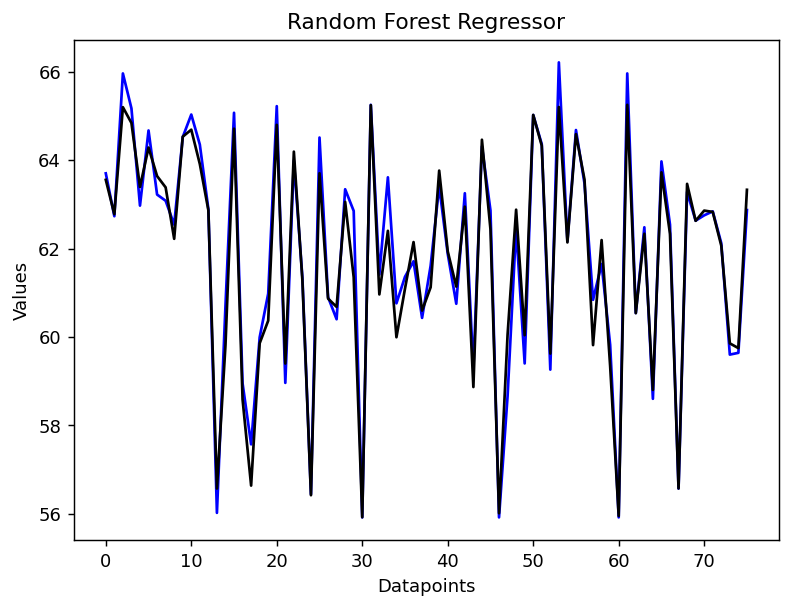

In [121]:
plt.figure(dpi = 130, figsize = (7,5))
plt.plot(Y_test, color = 'blue', label = 'Actual')
plt.plot(RFY_predict,color='black', label = 'Prediction')
plt.title("Random Forest Regressor")
plt.xlabel('Datapoints')
plt.ylabel('Values')
plt.show()
